<a href="https://colab.research.google.com/github/DT6A/Hands-On_Machine_Learning/blob/main/ML05_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision tree

##Classifier

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz( tree_clf, out_file="iris_tree.dot", feature_names=iris.feature_names[2:],
                class_names=iris.target_names, rounded=True, filled=True )

In [ ]:
!dot -Tpng iris_tree.dot -o iris_tree.png

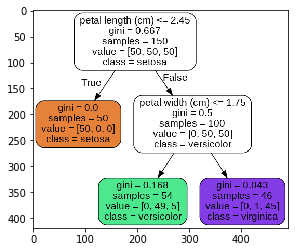

In [ ]:
import matplotlib.pyplot as plt

im = plt.imread('iris_tree.png')
plt.imshow(im)

In [ ]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict([[5, 1.5]])

array([1])

$G_i = 1 - \sum_{k=1}^n{p_{i, k}^2}$

$J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$

$H_i = - \sum_{k=1}^n{p_{i, k}log_2(p_{i, k})}$

##Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

X = np.linspace(-2, 2, 100)
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100) / 2

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X.reshape(-1, 1), y.reshape(-1, 1))

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

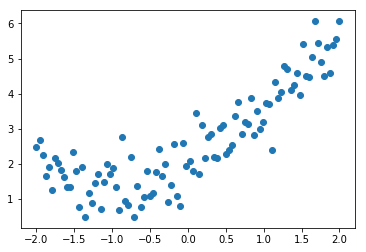

In [ ]:
plt.scatter(X, y)

In [ ]:
export_graphviz( tree_reg, out_file="reg_tree.dot", rounded=True, filled=True )

In [ ]:
!dot -Tpng reg_tree.dot -o reg_tree.png

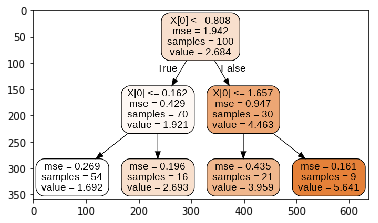

In [ ]:
im = plt.imread('reg_tree.png')
plt.imshow(im)

$\hat{y}_{node} = \frac{1}{m_{node}} \sum_{i \in node}{y^{(i)}}$

$J(k, t_k) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}$


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
grid_params = [
    {'max_depth': np.arange(2, 10), 'max_leaf_nodes': np.arange(4, 30)}
]

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), grid_params, scoring='accuracy',
                        cv=3)
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'max_leaf_nodes': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [ ]:
tree_grid.best_params_

{'max_depth': 6, 'max_leaf_nodes': 17}

In [ ]:
tree_grid.best_score_

0.8555

In [ ]:
best_tree = tree_grid.best_estimator_
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=17,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, best_tree.predict(X_test))

0.8695

In [ ]:
from sklearn.model_selection import ShuffleSplit

ids = ShuffleSplit(100, test_size=0, random_state=42).split(X_train)

In [ ]:
for i in ids:
  print(i)

In [ ]:
from sklearn.base import clone

Forest = [DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17) for _ in range(100)]
j = 0
acc = []

ids = ShuffleSplit(100, test_size=len(X_train)-100, random_state=42).split(X_train)

for i in ids:
  #print(i)
  x_b = X_train[i[0]]
  y_b = y_train.reshape(-1, 1)[i[0]]
  Forest[j].fit(x_b, y_b)
  acc.append(accuracy_score(y_test, Forest[j].predict(X_test)))
  j += 1

In [ ]:
np.mean(acc)

0.80295

In [ ]:
Y_pred = np.empty([100, len(X_test)], dtype=np.uint8)

In [ ]:
from scipy.stats import mode 

for i in range(100):
  Y_pred[i] = Forest[i].predict(X_test)

In [ ]:
res, _ = mode(Y_pred, axis=0)

In [ ]:
accuracy_score(y_test, res[0])

0.8735

In [ ]:
res

NameError: ignored